In [93]:
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import uniform
import scipy.interpolate as interpolate
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# 1. Estimating $\Pi$

Let's estimate the numerical value of $\pi$.

a. Generate $N=1000$ random points $(x,y)$ within a square by requiring the range of $x$ and $y$ are both within $[0, 1]$.

b. Visualize the result with red dots when data points are inside the unit circle (otherwise blue dots). In the figure, draw the unit circle as boundar line.

c. Count number of points inside the unit circle, and estimate the value and uncertainty of $\pi$.

We can use the fact that, analytically, the area of the ratio of the unit circle to the square defined by $x \in [-1,1], y \in [-1,1]$ should be $\frac{\pi}{2^2} = \frac{\pi}{4}$. Thus, we can take the experimental ratio of the number of points inside the quarter unit circle boundary to the ratio of the total number of points generated in the square $x \in [0,1], y \in [0,1]$, then multiply by 4 to get our Monte Carlo approximation for $\pi$.

In [155]:
#Our function for approximating pi. We generate random x- and y-values in the intervals [0,1], then proceed with our MC approximation by sampling whether particular (x,y) pairs have distance
#1 or less from the origin. We accept those that are within this distance - (xs_blue, ys_blue) - and reject those that are not within this distance - (xs_red, ys_red).
def approximate_pi(N):
    xs = uniform.rvs(loc=0, scale=1, size=N)
    ys = uniform.rvs(loc=0, scale=1, size=N)

    xs_blue = []
    ys_blue = []
    xs_red = []
    ys_red = []

    for xi, yi in zip(xs, ys):
        if np.sqrt(xi**2+yi**2) < 1:
            xs_blue.append(xi)
            ys_blue.append(yi)
        else:
            xs_red.append(xi)
            ys_red.append(yi)

    plt.scatter(xs_blue, ys_blue, color="blue")
    plt.scatter(xs_red, ys_red, color="red")

    x_is = np.linspace(0,1,1000)
    plt.plot(x_is, np.sqrt(1-(x_is)**2), color="green")
    plt.title("Points Inside Unit Circle (Blue) and Outside Unit Circle (Red)")

    ax = plt.gca()
    ax.set_aspect("equal")

    count_inside = len(xs_blue)
    pi_approx = count_inside / N * 4
    print("Approximation of pi with N =", str(N), "points: ", pi_approx)

In [156]:
Ns = [1000, 10000, 1000000]

Approximation of pi with N = 1000 points:  3.124


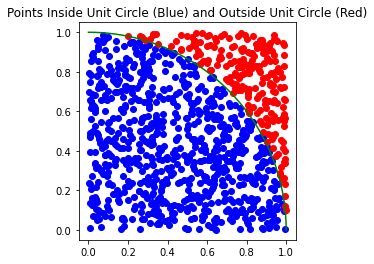

In [158]:
approximate_pi(Ns[0])

d. Repeat steps above with N=10K and 1000K. Discuss the results in terms of numerical consistency with known π value, and scaling rule of the uncertainty.

Approximation of pi with N = 10000 points:  3.1296


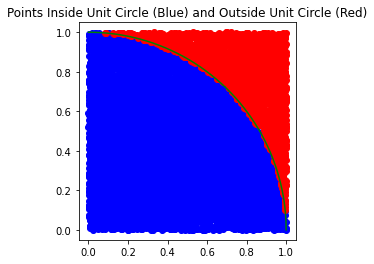

In [59]:
approximate_pi(Ns[1])

Approximation of pi with N = 1000000 points:  3.143816


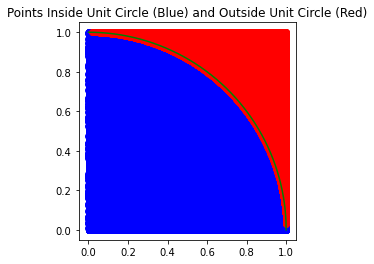

In [60]:
approximate_pi(Ns[2])

Our results above agree pretty well with the known value of $\pi = 3.1415926...$. The uncertainties of our results should follow that given by the 2D Monte Carlo uncertainty formula: $\sigma \sim \frac{(b-a)^2}{\sqrt{N}}$. For our three results, respectively, this yields $\sigma_{1000} = \frac{1^2}{\sqrt{1000}}(3.124) \approx 0.099, \sigma_{10k} = \frac{1^2}{\sqrt{10000}}(3.1296) \approx 0.031,$ and $\sigma_{1000k} = \frac{1^2}{\sqrt{1000000}}(3.143816) \approx 0.0031$. The exact value of $\pi$ agrees to within $1 \sigma$ with each of these results when combined with their corresponding uncertainties.

# 2. Parabola distribution

Generate a random distribution between $x=-1$ and $x=+1$ from the distribution function $f(x)=x^2$.

a. Using the rejection method. Generate a random variable $x_i$ uniformly distributed between -1 and +1, and a second random variable $y_i$ unformly distributed between 0 and $f(1)$ (i.e., the allowed range of the distribution function). Keep $x_i$ if $y_i < f(x_i)$. Generate a sample with $N=10K$ data points.


Here, $f(1) = 1$, so for $y_i$ we just generate a uniform distribution from $[0,1]$. We only keep those $x_i$ s that satisfy $y_i < f(x_i) = {x_i}^2$. Empirically, we need approximately $30,000$ input pairs $(x,y)$ to be generated in order to end up keeping $10,000$ $x$-values.

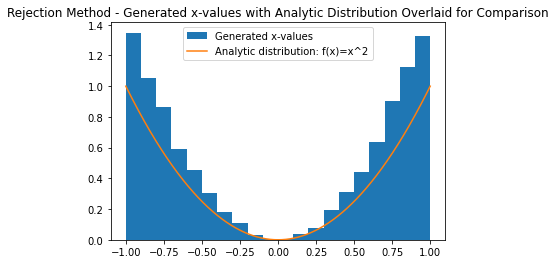

In [154]:
#Rejection method
x = uniform.rvs(loc=-1, scale=2, size=30000)
y = uniform.rvs(loc=0, scale=1, size=30000)
x_accepted = x[y < x**2]

# print(len(x))
# print(len(y))
# print(len(x_accepted))

horz_data = np.linspace(-1,1,1000)
plt.hist(x_accepted, bins=20, density=True, label="Generated x-values")
plt.plot(horz_data, horz_data**2, label="Analytic distribution: f(x)=x^2")
plt.legend()
plt.title("Rejection Method - Generated x-values with Analytic Distribution Overlaid for Comparison");

b. Using the inverse transformation method. Calculate the cumulative function $y=F(x)$ and derive the inverse transformation function $x=F^{-1}(y)$. Generate a random uniform distribution $y_i$ between $[-1, 1]$, and obtain the target distribution $x_i$ with $N=10K$ points.


The cumulative function $y = F(x)$ is given by the integral $y = \int_{-1}^{x} f(t) \ dt = \int_{-1}^{x} t^2 \ dt = \frac{t^3}{3} \mid_{-1}^{x} = \frac{x^3}{3} + \frac{1}{3}$. In order to normalize the cdf to a total area of 1, we must multiply the indefinite part of the integral by $\frac{3}{2}$ (since $\int_{-1}^1 \frac{x^3}{3} = \frac{2}{3}$) to get $y = \frac{3}{2}(\frac{x^3}{3} + \frac{1}{3}) = \frac{x^3}{2} + \frac{1}{2}$, so the inverse is given by $x = F^{-1}(y) = (2y-1)^{\frac{1}{3}}$. We can then generate $y_i$ as instructed and use $F^{-1}$ to find the distribution of $x_i$. Because this is a one-to-one transformation, we only need 10,000 points to generate $N = 10k$ output points.

Text(0.5, 1.0, 'Inverse Transformation Method')

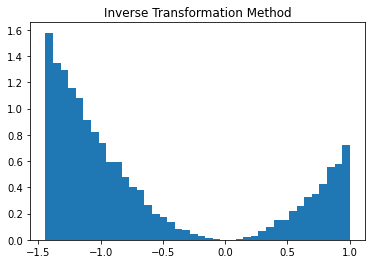

In [327]:
#Feed in starting uniform distribution between -1 and 1, run in order to get 10000 samples.
N_samples = 10000
y_i = uniform.rvs(loc=-1, scale=2, size=10000)
x_i = np.cbrt(2*y_i - 1)

plt.hist(x_i, bins=40, density=True);
plt.title("Inverse Transformation Method")
# plt.hist(x_i, bins=20);

c. Compare the consistency of the two methods above by drawing the two simulated distributions and the target distribution function $f(x)$ in the same plot. Comment on which method is more effective in terms of the total number of random numbers required for MC simulations.

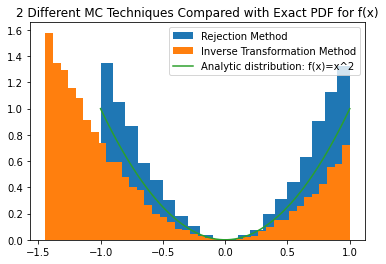

In [330]:
#Put both MC approximations of f(x) and the exact pdf of f(x) on one plot to compare them side-by-side.
plt.hist(x_accepted, bins=20, density=True, label="Rejection Method")
plt.hist(x_i, bins=40, density=True, label="Inverse Transformation Method");
plt.plot(horz_data, horz_data**2, label="Analytic distribution: f(x)=x^2")
plt.legend()
plt.title("2 Different MC Techniques Compared with Exact PDF for f(x)");

Comparing the two Monte Carlo methods, the inverse transformation method requires fewer random samples than the rejection method—in this case, $30,000$ samples were required for the rejection method while only $10,000$ samples were required for the inverse transformation method.